# Car Price



# Table of Contents

* [1. Introduction](#introduction)
* [2. Loading the Data](#loading-data)
* [3. EDA](#eda)
* [4. Model](#model)
* [5. Evaluation](#evaluation)


- Reference:
    - [Kaggle](https://www.kaggle.com/)
#  1. Introduction <a class="anchor" id="introduction"></a>
Business Goal: 
You are asked to build a car price model with features in the data set. It will be used by the Product team to understand exactly how the price changes with those features. Accordingly, they can come up with car design options, business strategies, etc. to respond to each certain price segment. Furthermore, this model will be a good way for BOD to understand the pricing of a new market.

# 2. Loading the Data <a class="anchor" id="loading-data"></a>

### 2.1 Import Library

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import graphviz
import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE
#Constant value
seed = 42

### 2.2 Load dataset

In [122]:
df = pd.read_csv("data/Bank_Assignment.csv")
df.sample(5)
#df.head(5)
#df.tail(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
8884,15749583,686,Germany,Female,38,2,93569.86,3,0,0,10137.34,1
1485,15700212,475,France,Female,46,10,0.00,2,0,0,122953.00,1
5087,15624641,740,Spain,Male,43,9,0.00,1,1,0,199290.68,1
4651,15579996,524,Germany,Female,25,7,131402.21,1,0,0,193668.49,0
4260,15664555,587,France,Male,40,2,0.00,4,0,1,106174.70,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## 3. EDA <a class='anchor' id="eda"></a>

#### 3.1 Solve NaN value

In [124]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [125]:
#Drop column customer_id because it isn't feature
cl_drop = ['customer_id']
df.drop(columns= cl_drop,inplace = True)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [126]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [127]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [128]:
categorical_column_selector = df.select_dtypes(include=['object']).columns
numerical_column_selector = df.select_dtypes(include=['number']).columns
print("Numerical feature : ", numerical_column_selector)
print("Categorical feature : ", categorical_column_selector)

Numerical feature :  Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')
Categorical feature :  Index(['country', 'gender'], dtype='object')


In [129]:
categorical_data = df[categorical_column_selector]
numerical_data = df[numerical_column_selector]

In [130]:
categorical_data.value_counts()

country  gender
France   Male      2753
         Female    2261
Spain    Male      1388
Germany  Male      1316
         Female    1193
Spain    Female    1089
dtype: int64

#### 3.2 Encode data

In [131]:
df[categorical_column_selector] = df[categorical_column_selector].apply(LabelEncoder().fit_transform)
df.sample(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
328,671,1,1,35,1,144848.74,1,1,1,179012.30,0
3134,694,0,1,34,5,127900.03,1,1,0,101737.80,0
6587,707,0,0,33,2,58036.33,1,1,1,83335.78,0
2640,625,2,0,31,8,0.00,2,1,0,151843.54,0
3462,428,0,0,62,1,107735.93,1,0,1,58381.77,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


#### 3.3 Standardise data(skip)

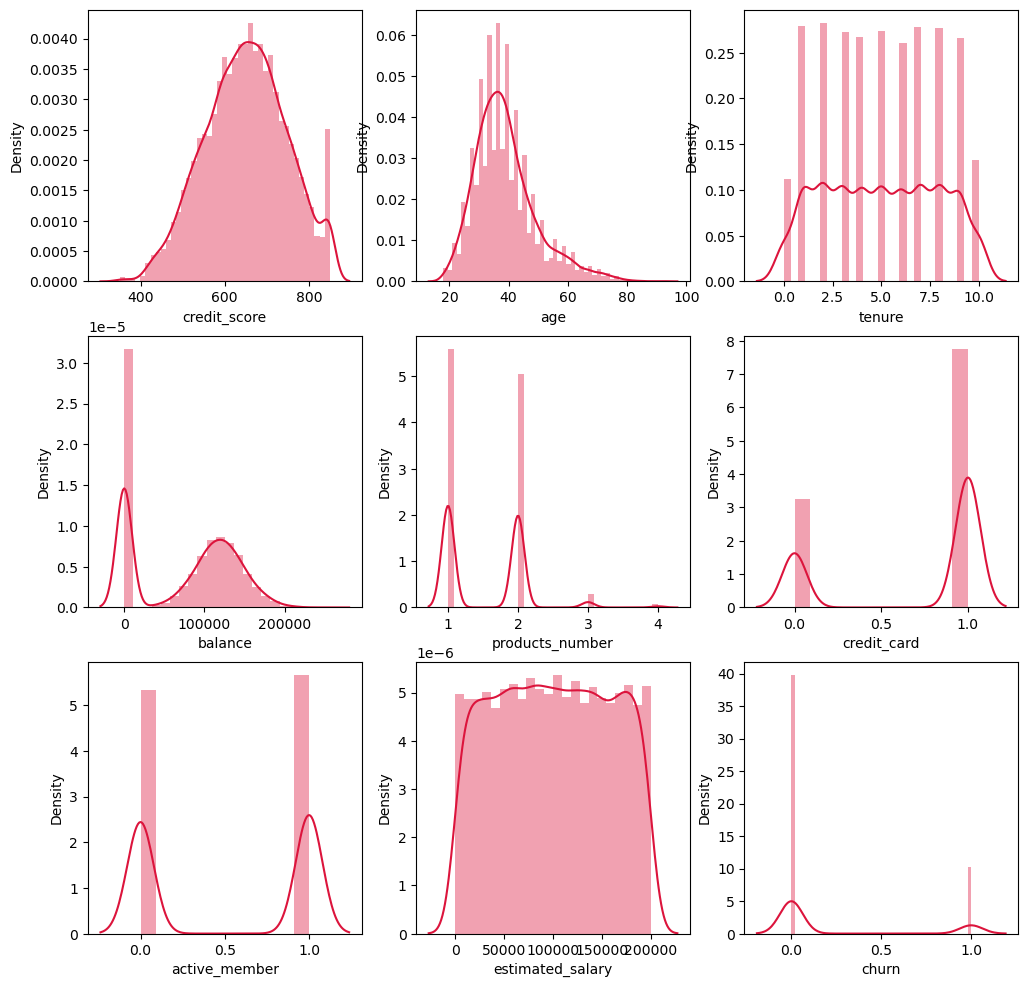

In [133]:
n_row , n_col = (3,3)
fig,ax = plt.subplots(n_row,n_col,figsize = (12,12));
for i, cl in enumerate(numerical_column_selector):
    g = sns.distplot(df[cl], ax = ax[i//n_col,i%n_col], color = 'crimson')

+ Balace has 0 value in high number 

#### 3.4 Feature selection

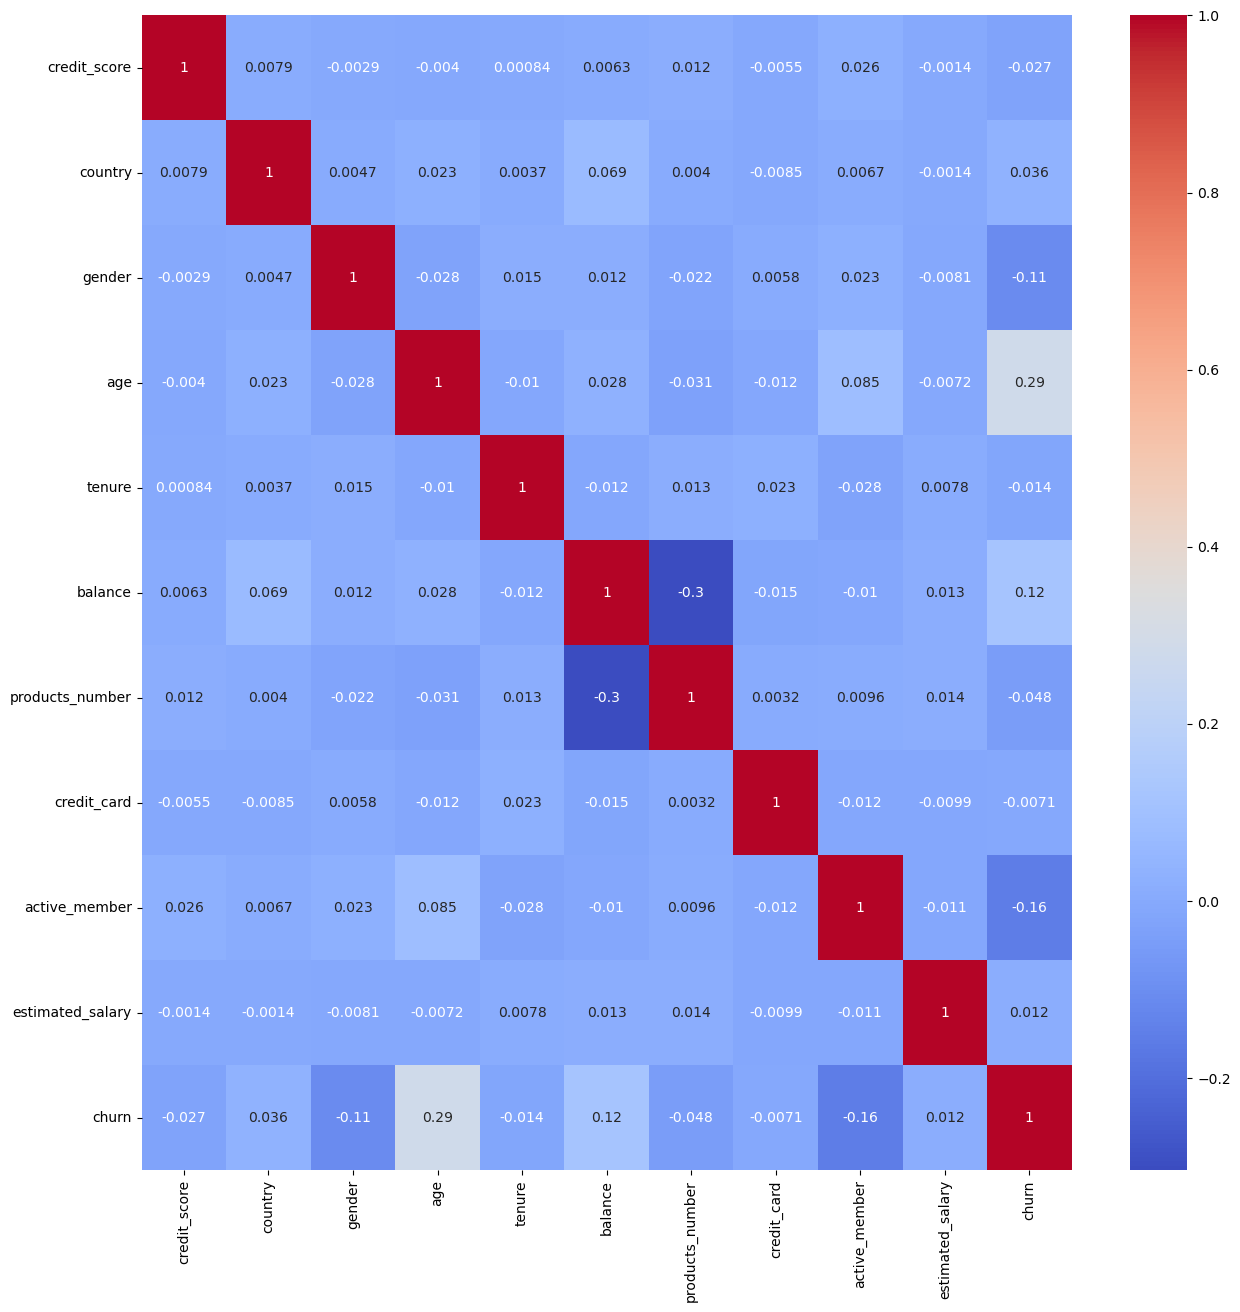

In [134]:
plt.figure(figsize = (15,15));
sns.heatmap(df.corr(),annot = True, cmap='coolwarm');
plt.show();

#### 3.5 Spilt data

In [135]:
target = 'churn'
X , y = df.drop(columns= [target]) , df[target] 
X.shape, y.shape

((10000, 10), (10000,))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## 4. Model building<a class='anchor' id ='model'></a>

In [137]:
# First test with Logistic Regression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

print(f"Accuracy score of LR : {accuracy_score(y_pred,y_test)}")

Accuracy score of LR : 0.8006666666666666


In [138]:
cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix

array([[2354,  536],
       [  62,   48]])

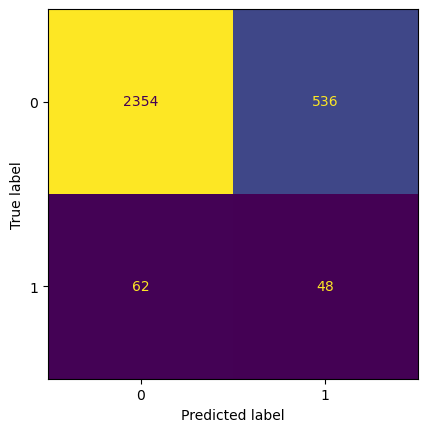

In [139]:
ConfusionMatrixDisplay.from_predictions(
    y_pred,y_test, colorbar=False
)

In [140]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2890
           1       0.08      0.44      0.14       110

    accuracy                           0.80      3000
   macro avg       0.53      0.63      0.51      3000
weighted avg       0.94      0.80      0.86      3000



#### Solve imbalance data

In [141]:
df[target].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

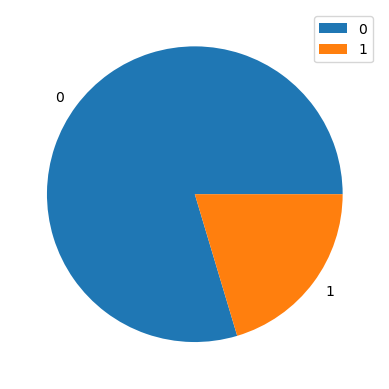

In [142]:
plt.pie(df[target].value_counts(),labels= [ '0','1']);
plt.legend();

In [143]:
SM = SMOTE()
X_SM, y_SM = SM.fit_resample(X_train, y_train)
X_SM.shape, y_SM.shape

((11094, 10), (11094,))

In [144]:
X_train = X_SM
y_train = y_SM
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

In [145]:
print(f"Accuracy score of LR : {accuracy_score(y_pred,y_test)}")

Accuracy score of LR : 0.648


In [146]:
cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix

array([[1590,  230],
       [ 826,  354]])

In [147]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1820
           1       0.61      0.30      0.40      1180

    accuracy                           0.65      3000
   macro avg       0.63      0.59      0.58      3000
weighted avg       0.64      0.65      0.61      3000



In [148]:
print(f"F1 score : {f1_score(y_pred,y_test)}")
print(f"Accuracy score : {accuracy_score(y_pred,y_test)}")


F1 score : 0.4013605442176871
Accuracy score : 0.648


In [149]:
# Try with DecisionTree

model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
print(f"F1 score : {f1_score(y_pred,y_test)}")
print(f"Accuracy score : {accuracy_score(y_pred,y_test)}")

F1 score : 0.47535211267605637
Accuracy score : 0.8013333333333333


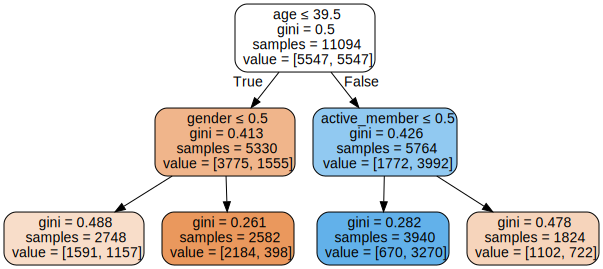

In [150]:
dot_data = export_graphviz(model_tree, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [151]:
cf_matrix = confusion_matrix(y_pred,y_test)
cf_matrix

array([[2134,  314],
       [ 282,  270]])

In [152]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2448
           1       0.46      0.49      0.48       552

    accuracy                           0.80      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.81      0.80      0.80      3000



##### Hyperparameter tuning

----------------------------------------------------------------------------------------------------
Depth = 2
F1 score : 0.47535211267605637
Accuracy score : 0.8013333333333333


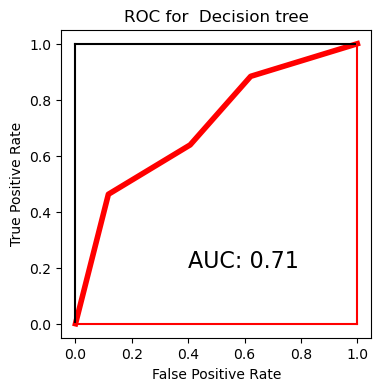

----------------------------------------------------------------------------------------------------
Depth = 3
F1 score : 0.449244060475162
Accuracy score : 0.66


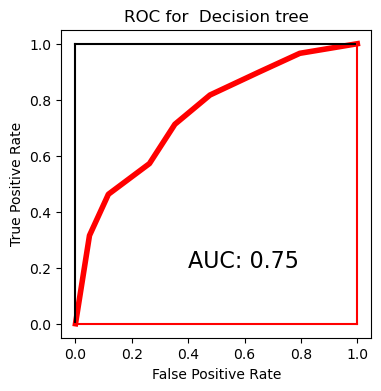

----------------------------------------------------------------------------------------------------
Depth = 4
F1 score : 0.5146666666666666
Accuracy score : 0.7573333333333333


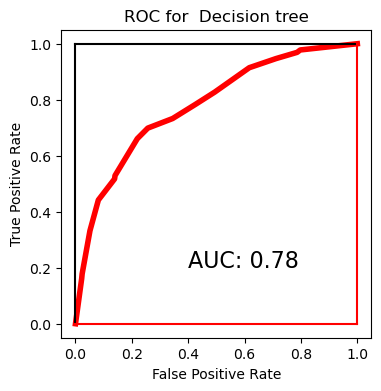

----------------------------------------------------------------------------------------------------
Depth = 5
F1 score : 0.5109395109395108
Accuracy score : 0.7466666666666667


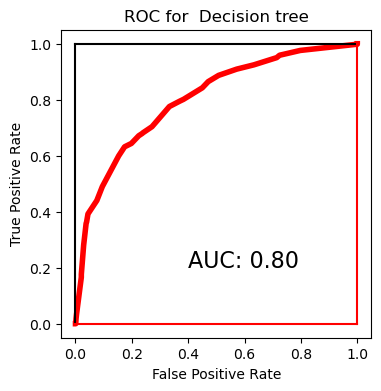

----------------------------------------------------------------------------------------------------
Depth = 6
F1 score : 0.5359765051395007
Accuracy score : 0.7893333333333333


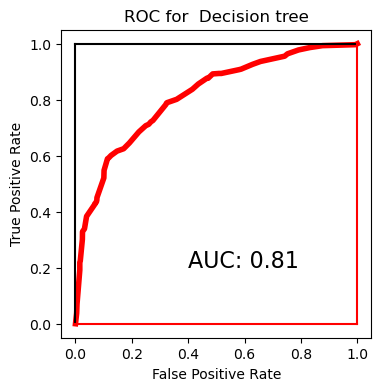

----------------------------------------------------------------------------------------------------
Depth = 7
F1 score : 0.5413427561837456
Accuracy score : 0.7836666666666666


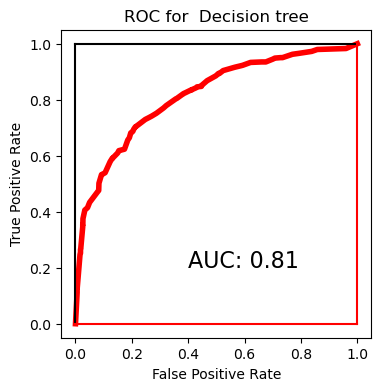

----------------------------------------------------------------------------------------------------
Depth = 8
F1 score : 0.5381968341362697
Accuracy score : 0.7763333333333333


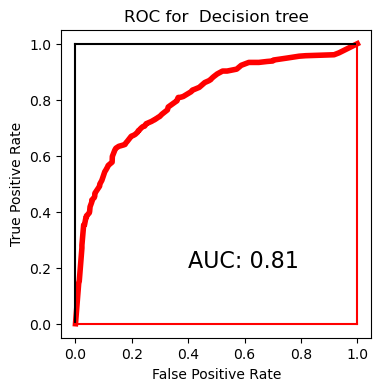

----------------------------------------------------------------------------------------------------
Depth = 9
F1 score : 0.520904729266621
Accuracy score : 0.767


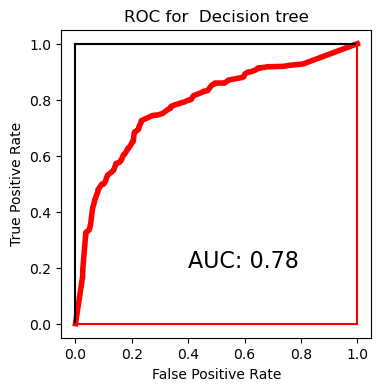

----------------------------------------------------------------------------------------------------
Depth = 10
F1 score : 0.5229681978798587
Accuracy score : 0.775


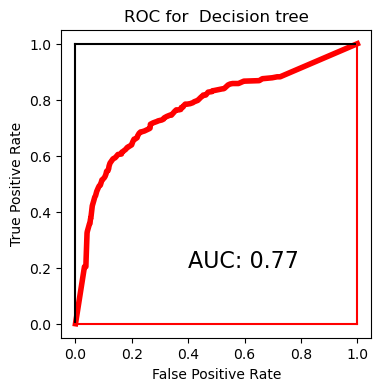

----------------------------------------------------------------------------------------------------
Depth = 11
F1 score : 0.521497919556172
Accuracy score : 0.77


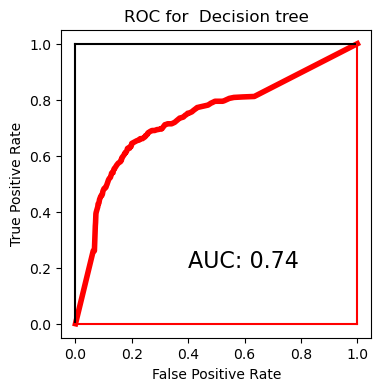

----------------------------------------------------------------------------------------------------
Depth = 12
F1 score : 0.5210780926053904
Accuracy score : 0.769


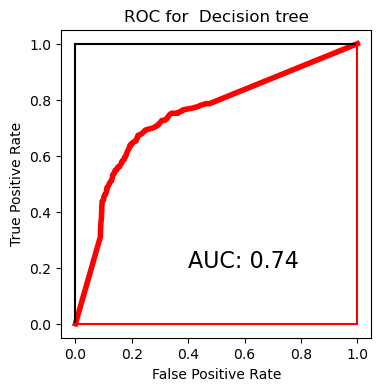

----------------------------------------------------------------------------------------------------
Depth = 13
F1 score : 0.49593495934959353
Accuracy score : 0.752


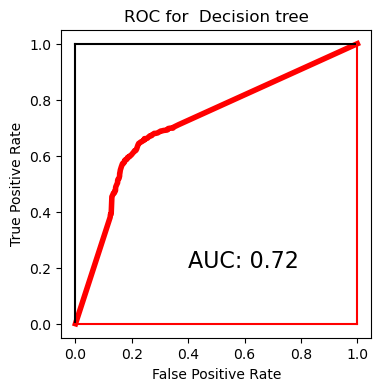

----------------------------------------------------------------------------------------------------
Depth = 14
F1 score : 0.4982888432580425
Accuracy score : 0.7556666666666667


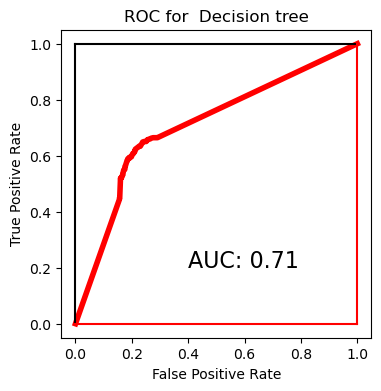

----------------------------------------------------------------------------------------------------
Depth = 15
F1 score : 0.4827118644067797
Accuracy score : 0.7456666666666667


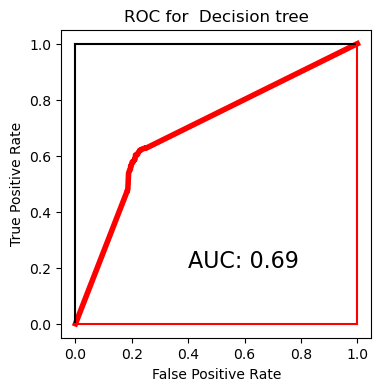

----------------------------------------------------------------------------------------------------
Depth = 16
F1 score : 0.47734956051386074
Accuracy score : 0.7423333333333333


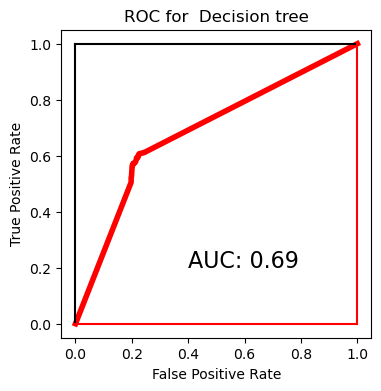

----------------------------------------------------------------------------------------------------
Depth = 17
F1 score : 0.46931894807821983
Accuracy score : 0.7376666666666667


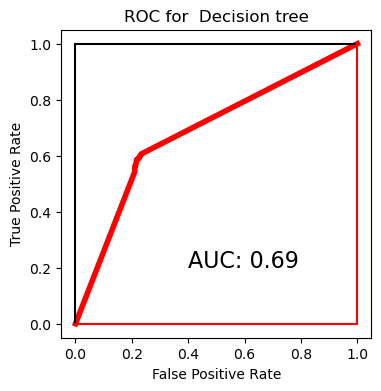

----------------------------------------------------------------------------------------------------
Depth = 18
F1 score : 0.48484848484848486
Accuracy score : 0.745


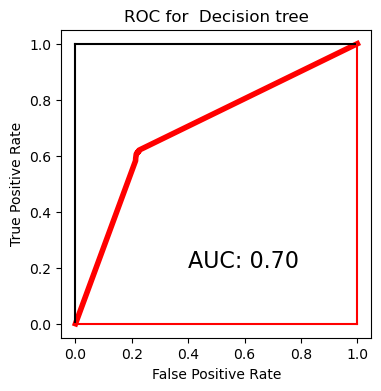

----------------------------------------------------------------------------------------------------
Depth = 19
F1 score : 0.48393711551606294
Accuracy score : 0.7483333333333333


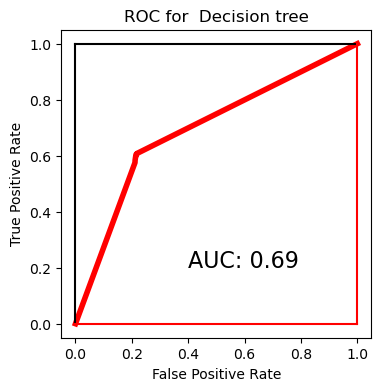

In [155]:
max_depth = 20
for depth in range(2,max_depth):
    model_tree = DecisionTreeClassifier(max_depth=depth)
    model_tree.fit(X_train,y_train)
    y_pred = model_tree.predict(X_test)
    print(100*"-")
    print(f"Depth = {depth}")
    print(f"F1 score : {f1_score(y_pred,y_test)}")
    print(f"Accuracy score : {accuracy_score(y_pred,y_test)}")
    y_probabilities = model_tree.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
    plt.figure(figsize=(4,4))
    plt.title('ROC for  Decision tree')
    plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
    #plt.plot([0,1],ls='--',linewidth=5)
    plt.plot([0,0],[1,0],c='0')
    plt.plot([1,1],c='0')
    plt.plot([0,0],c='r')
    plt.plot([1,1],[1,0],c='r')
    plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [175]:
#Choose k = 7

model_tree = DecisionTreeClassifier(max_depth=7)
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
print(100*"-")
print(f"Depth = {depth}")
print(f"F1 score : {f1_score(y_pred,y_test)}")
print(f"Accuracy score : {accuracy_score(y_pred,y_test)}")
print(classification_report(y_pred,y_test))

----------------------------------------------------------------------------------------------------
Depth = 19
F1 score : 0.5392781316348195
Accuracy score : 0.783
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2171
           1       0.65      0.46      0.54       829

    accuracy                           0.78      3000
   macro avg       0.73      0.68      0.70      3000
weighted avg       0.77      0.78      0.77      3000



#### Baseline Model Comparision

In [171]:
#pipeline
pipeline_lr = Pipeline([('scalar1', StandardScaler()), ('lr_classifier',LogisticRegression())])
pipeline_dt = Pipeline([('scalar2', StandardScaler()), ('dt_classifier',DecisionTreeClassifier(max_depth=2))])
pipeline_rf = Pipeline([('scalar3', StandardScaler()), ('rf_classifier',RandomForestClassifier())])
pipeline_kn = Pipeline([('scalar4', StandardScaler()), ('kn_classifier',KNeighborsClassifier())])
pipeline_gau = Pipeline([('scalar5', StandardScaler()), ('gau_classifier',GaussianNB())])
pipeline_svm = Pipeline([('scalar5', StandardScaler()), ('svc',SVC())])


pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_gau,pipeline_svm]
pipe_dict = {0: 'LogisticRegression', 1 : "Decision Tree", 2 : "RandomForest", 3: "KNeighbors", 4 : "GaussianNB", 5 : "SVM"}

In [172]:
score = []
for i, pipe in enumerate(pipelines):
    pipe.fit(X_train,y_train)
    score.append(pipe.score(X_test,y_test))
    print(f"{pipe_dict[i]} score : {score[i]}")

LogisticRegression score : 0.7253333333333334
Decision Tree score : 0.8013333333333333
RandomForest score : 0.8146666666666667
KNeighbors score : 0.778
GaussianNB score : 0.755
SVM score : 0.8083333333333333


In [180]:
model = [
    LogisticRegression()
    , DecisionTreeClassifier(max_depth=2)
    , RandomForestClassifier()
    , KNeighborsClassifier()
    , GaussianNB()
    , SVC()
]

LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier
GaussianNB
SVC


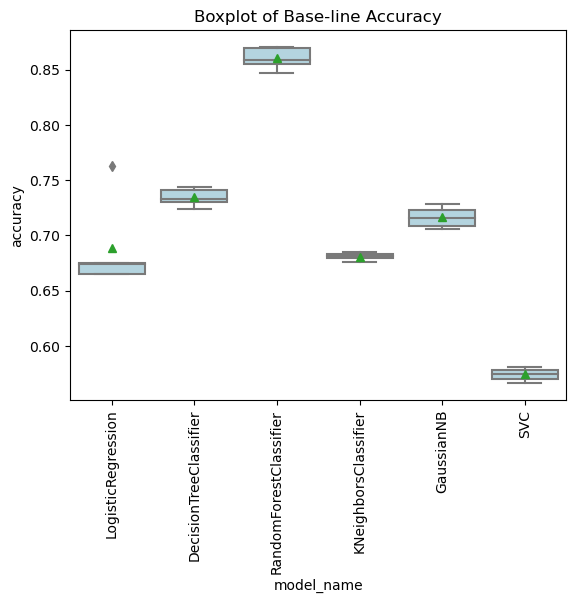

,Mean,Standard deviation
model_name,,
RandomForestClassifier,0.860195,0.010097
DecisionTreeClassifier,0.734361,0.008130
GaussianNB,0.716334,0.009672
LogisticRegression,0.688397,0.041639
KNeighborsClassifier,0.680729,0.003694
SVC,0.574095,0.005939


In [181]:
def generate_baseline_results(models, X,y, metrics, cv = 5, plot_results=False):
    #Define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state = 2022)
    entries = []
    # Loop through models
    for model in models:
        model_name = model.__class__.__name__
        print(model_name)
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    #List down accuracy per fold for each model  
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', metrics])

    #Plot Base-Line Model Performance
    if plot_results:
        sns.boxplot(x='model_name', y=metrics, 
                    data=cv_df, 
                    color='lightblue', 
                    showmeans=True)
        plt.title("Boxplot of Base-line Accuracy")
        plt.xticks(rotation = 90)
        plt.show()
    
    #Summary
    mean = cv_df.groupby('model_name')[metrics].mean()
    std= cv_df.groupby('model_name')[metrics].std()

    baseline_results = pd.concat([mean, std], axis= 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard deviation']

    # sort by accuracy
    baseline_results.sort_values(by=['Mean'], axis=0, ascending=False, inplace=True)
    return baseline_results

baseline_results = generate_baseline_results(model, X_train, y_train, 'accuracy',plot_results=True)
baseline_results

##### RandomForest give the highest accuracy score => Use RandomForest to build model

#### Optimize model

In [189]:
hps = {
    'n_estimators' : [2,10,20,100,200],
    'max_depth' : [2,5,10,20,20],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

grids = RandomizedSearchCV(RandomForestClassifier(), hps,cv = 10,scoring='accuracy', n_jobs=1)

In [190]:
grids.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 5, 10, 20, 20],
                                        'n_estimators': [2, 10, 20, 100, 200]},
                   scoring='accuracy')

In [196]:
grids.best_params_

{'n_estimators': 200, 'max_depth': 20, 'criterion': 'log_loss'}

In [197]:
grids.best_score_

0.8624645204266486

#### Final model


In [202]:
final_model = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='log_loss')
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print(final_model.score(X_test,y_test))

0.8193333333333334


In [203]:
cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix

array([[2088,  214],
       [ 328,  370]])

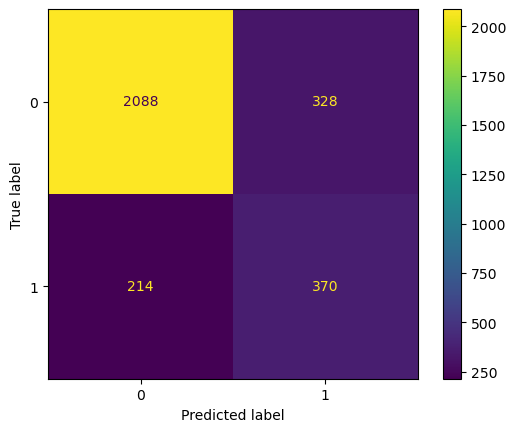

In [205]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## 5. Evaluation<a class='anchor' id='evaluation'></a>

In [204]:
print(f"Accuracy score : {accuracy_score(y_pred,y_test)}")

Accuracy score : 0.8193333333333334


In [206]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2302
           1       0.63      0.53      0.58       698

    accuracy                           0.82      3000
   macro avg       0.75      0.72      0.73      3000
weighted avg       0.81      0.82      0.81      3000



F1 score : 0.5772230889235569
Accuracy score : 0.8193333333333334


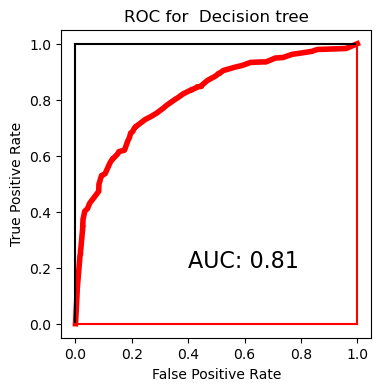

In [208]:
#ROC AUC for RandomForest
print(f"F1 score : {f1_score(y_pred,y_test)}")
print(f"Accuracy score : {accuracy_score(y_pred,y_test)}")
y_probabilities = model_tree.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  Decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='r')
plt.plot([1,1],[1,0],c='r')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()